# Lab 3 (Data Classification)

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import io
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib import cm as cm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (7).csv


In [111]:
names = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')) ,names = names)
df['class'].value_counts()


g    12332
h     6688
Name: class, dtype: int64

# Data Balancing

In [112]:
df_majority = df.loc[df['class'] == 'g']
df_minority = df.loc[df['class'] == 'h']
count_class_g , count_class_h = df['class'].value_counts()

df_majority_downsampled = df_majority.sample(count_class_h)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['class'].value_counts()

g    6688
h    6688
Name: class, dtype: int64

# Data Visualisation After Balancing

In [113]:
for attr1 in names[:10]:
    for attr2 in names[:10] :
        if (attr1 != attr2):
          facet = sns.lmplot(data=df_downsampled, x=attr1, y=attr2, hue='class', 
                  markers=["o", "x"])
          plt.show()

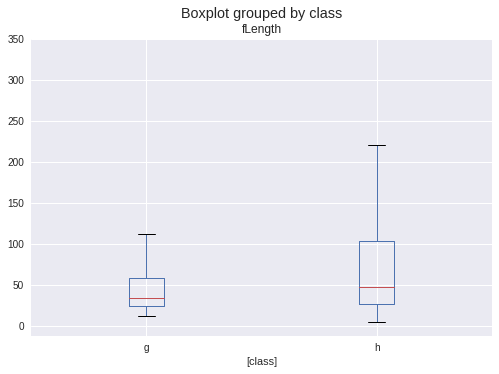

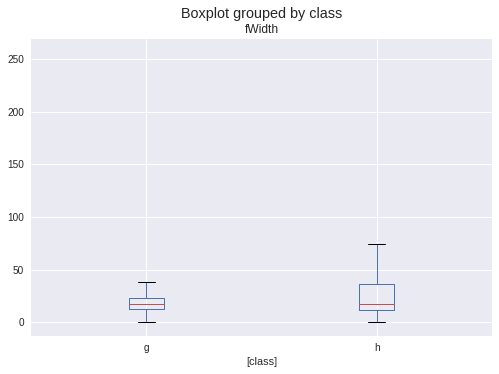

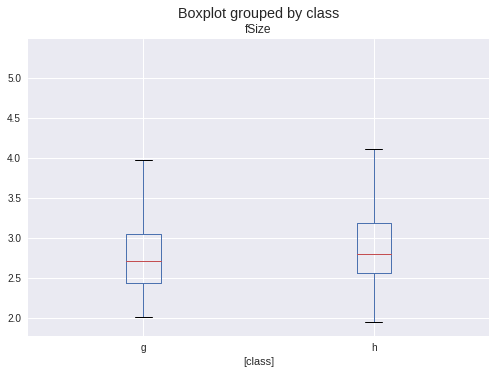

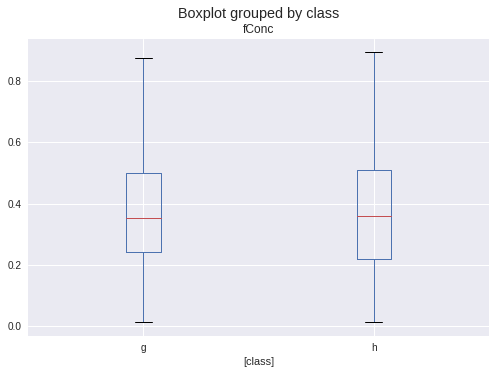

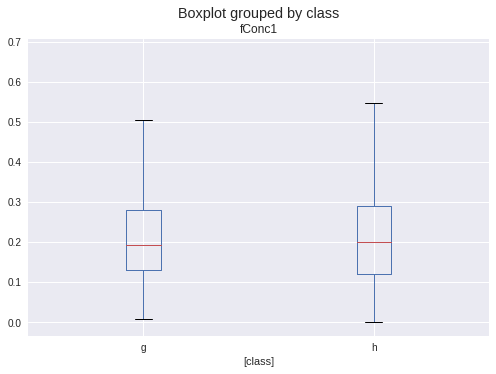

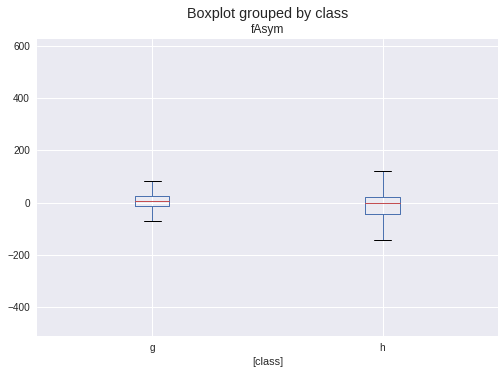

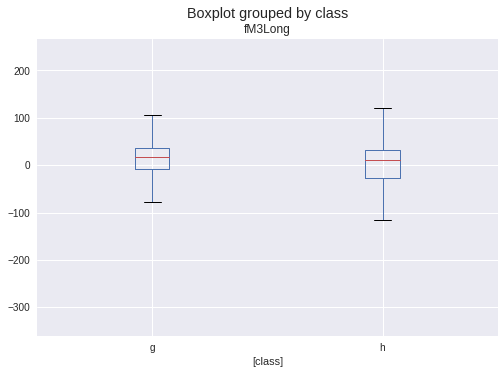

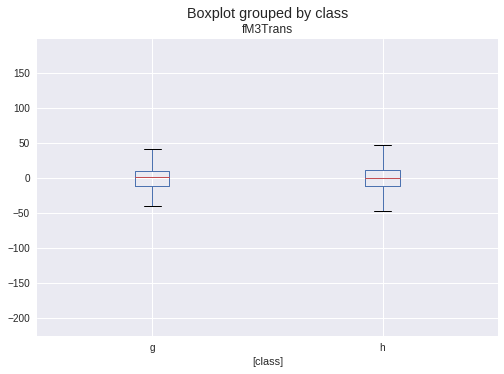

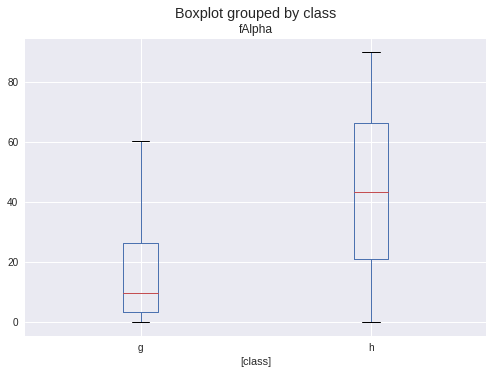

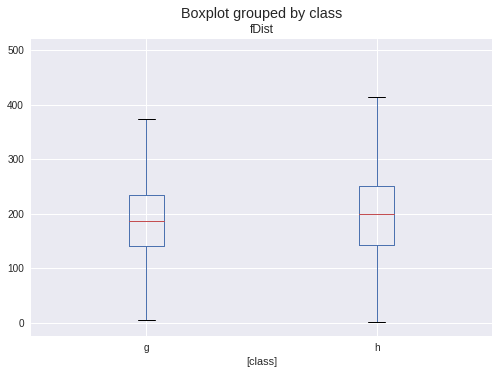

In [114]:
#Box plot
for ind in range(len(names[:10])):
    boxplot = df_downsampled.boxplot(column=names[ind], by=['class'])
    plt.show()  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9526fd5f8>,
      dtype=object)

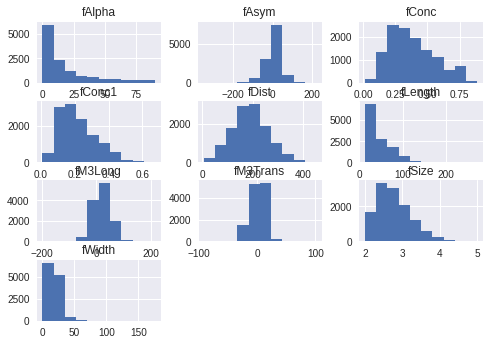

In [102]:
# majority histogram
df_majority.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb954168b70>,
      dtype=object)

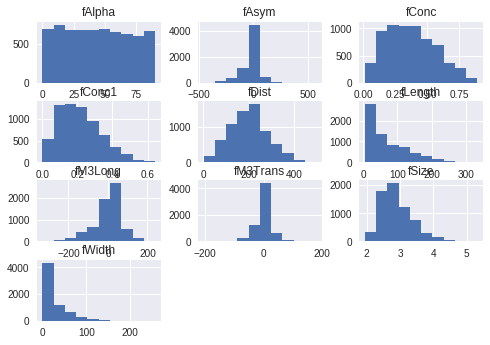

In [103]:
# minority hisogram
df_minority.hist()

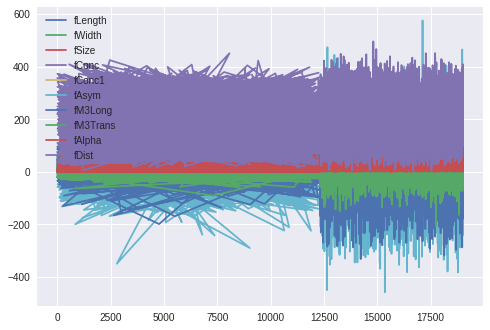

In [104]:
df_downsampled.plot.line()

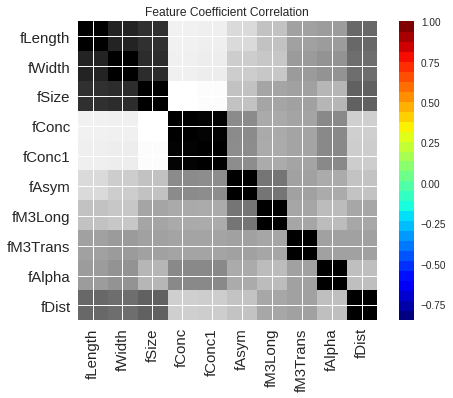

In [105]:
#correlation matrix
coef_correlation = df_downsampled.corr(method="pearson")
x=[i for i in range(0,10)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)

plt.title('Feature Coefficient Correlation')
plt.xticks(x,coef_correlation.columns.values,fontsize=15,rotation="vertical")
plt.yticks(x,coef_correlation.columns.values,fontsize=15)
plt.colorbar(cax)
plt.imshow(coef_correlation)

plt.show()

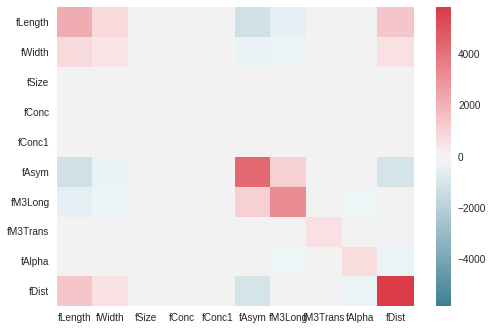

In [106]:
#covariance matrix
covariance=df_downsampled.cov()
plt.figure()
sns.heatmap(covariance, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=covariance.columns.values,
         yticklabels=covariance.columns.values)

# Data Split

In [115]:
train, test = train_test_split(df_downsampled, test_size=0.3)
print('train size',len(train))
print('test size',len(test))

train size 9363
test size 4013


# Preprocessing

In [117]:
from sklearn.preprocessing import LabelEncoder
train_array = train.iloc[:,:-1].values
test_array = test.iloc[:,:-1].values
train_labels = train.iloc[:,-1].values
test_labels = test.iloc[:,-1].values
orginal_train = train_array
orginal_test = test_array
#min_max normalisation
scaler = MinMaxScaler()
train_array = scaler.fit_transform(train_array)
test_array = scaler.fit_transform(test_array)
train.shape


(9363, 11)

In [118]:
#feature selection on train
train_new = SelectKBest(chi2, k=5).fit_transform(train_array, train_labels)
train_new

array([[0.13247548, 0.05642479, 0.31835588, 0.64665524, 0.04413778],
       [0.07644437, 0.01331607, 0.2366747 , 0.61751935, 0.21570778],
       [0.06945817, 0.03564642, 0.13797789, 0.60573214, 0.30384111],
       ...,
       [0.0703809 , 0.03437878, 0.17725897, 0.60907471, 0.62126444],
       [0.05877473, 0.        , 0.07989006, 0.58196705, 0.53083444],
       [0.04964238, 0.03698739, 0.1326663 , 0.54934757, 0.93825333]])

In [119]:
#feture selection on test
test_new = SelectKBest(chi2, k=5).fit_transform(test_array, test_labels)
test_new

array([[0.05223196, 0.088328  , 0.24729819, 0.61580406, 0.15804222],
       [0.08090168, 0.07278927, 0.20150335, 0.57013401, 0.18410111],
       [0.24689527, 0.11820574, 0.33798225, 0.67175666, 0.80254333],
       ...,
       [0.16384985, 0.08250465, 0.14124857, 0.66118566, 0.12506889],
       [0.07998847, 0.1159779 , 0.25300368, 0.63557894, 0.05494   ],
       [0.05082546, 0.10653437, 0.1996619 , 0.56196566, 0.32369333]])

# Decision Tree Classifier

In [120]:
from sklearn import tree
d_tree_clf = tree.DecisionTreeClassifier()
d_tree_clf.fit(orginal_train,train_labels)
prediction=d_tree_clf.predict(orginal_test)
print("Traing in the orginal data :")
print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                   average = "macro"))
print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                   average = "macro"))
print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")
d_tree_clf.fit(train_new,train_labels)
prediction=d_tree_clf.predict(test_new)
print("Traing in the preprocessing data :")
print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                   average = "macro"))
print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                   average = "macro"))
print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")


Traing in the orginal data :
Accuracy score : 0.7889359581360578
Precision score: 0.7889432520320356
F1_score: 0.7889359057113485
Recall_score: 0.7889451180406489 

Traing in the preprocessing data :
Accuracy score : 0.6698230750062297
Precision score: 0.6700179979592709
F1_score: 0.6682309132435904
Recall_score: 0.6734799159585064 



# AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators_vals = [20,40,60,80,100,200,300]
for i in n_estimators_vals :
  # Create and fit an AdaBoosted decision tree
  bdt = AdaBoostClassifier(n_estimators=i)
  bdt.fit(orginal_train,train_labels)
  prediction=bdt.predict(orginal_test)
  print("\t\tn_estimators : ", i )
  print("Traing in the orginal data :")
  
  bdt.fit(train_new,train_labels)
  prediction=bdt.predict(test_new)
  print("Traing in the preprocessing data :")
  print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
  print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                     average = "macro"))
  print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                     average = "macro"))
  print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")
  

# K-Nearest Neighbor (K-NN)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

k_vals = [1,2,3,4,5,6,7,8,9,10,20,100]  
for i in k_vals: 
        knn_fit = KNeighborsClassifier(n_neighbors=i) 
        knn_fit.fit(train_new,train_labels) 
        prediction=knn_fit.predict(test_new)
        print("\t\tn_neighbors : ", i)
        print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
        print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                           average = "macro"))
        print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                           average = "macro"))
        print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")


# Random Forests

In [0]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_vals = [10,20,40,60,80,100,200,300]
for i in n_estimators_vals :
  R_Forest_clf = RandomForestClassifier(n_estimators=i)
  R_Forest_clf.fit(train_new,train_labels)
  prediction=R_Forest_clf.predict(test_new)
  print("\t\tn_estimators : ", i )
  print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
  print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                     average = "macro"))
  print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                     average = "macro"))
  print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")

# SVM Classifier

In [0]:
from sklearn import svm
C_range = [1e-2, 1, 1e2]
for i in C_range :
  svm_clf = svm.SVC(C=i, gamma='auto')
  svm_clf.fit(train_new,train_labels)
  print("\t\tC : ", i )
  print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
  print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                     average = "macro"))
  print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                     average = "macro"))
  print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")


# Naïve Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_new, train_labels)
prediction=clf.predict(test_new)
print("Accuracy score :" ,metrics.accuracy_score(prediction,test_labels))
print("Precision score:" ,metrics.precision_score(prediction,test_labels,
                                                   average = "macro"))
print("F1_score:", metrics.f1_score(prediction,test_labels,
                                                   average = "macro"))
print("Recall_score:", metrics.recall_score(prediction,test_labels,
                                                     average = "macro"),"\n")